***Akanksha Chatrabhuj Khandare***

***Assignment 8 Clustering***

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


***Load dataset***

In [23]:
xls = pd.ExcelFile("EastWestAirlines.xlsx")
print("Available sheets:", xls.sheet_names)

df = pd.read_excel(xls, sheet_name="data")
df.columns = df.columns.str.strip()


Available sheets: ['Description', 'data']


***Data Preprocessing***

In [24]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Handle missing values
df_numeric = df_numeric.fillna(0)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("✅ Preprocessing done. Shape of numeric data:", df_numeric.shape)


✅ Preprocessing done. Shape of numeric data: (3999, 12)


Only numeric columns are selected because clustering algorithms require numerical inputs.

Missing values are filled with 0 (or could use mean/median).

StandardScaler normalizes data to mean=0 and std=1 to avoid dominance of features with larger values.

***EDA***

HISTOGRAM

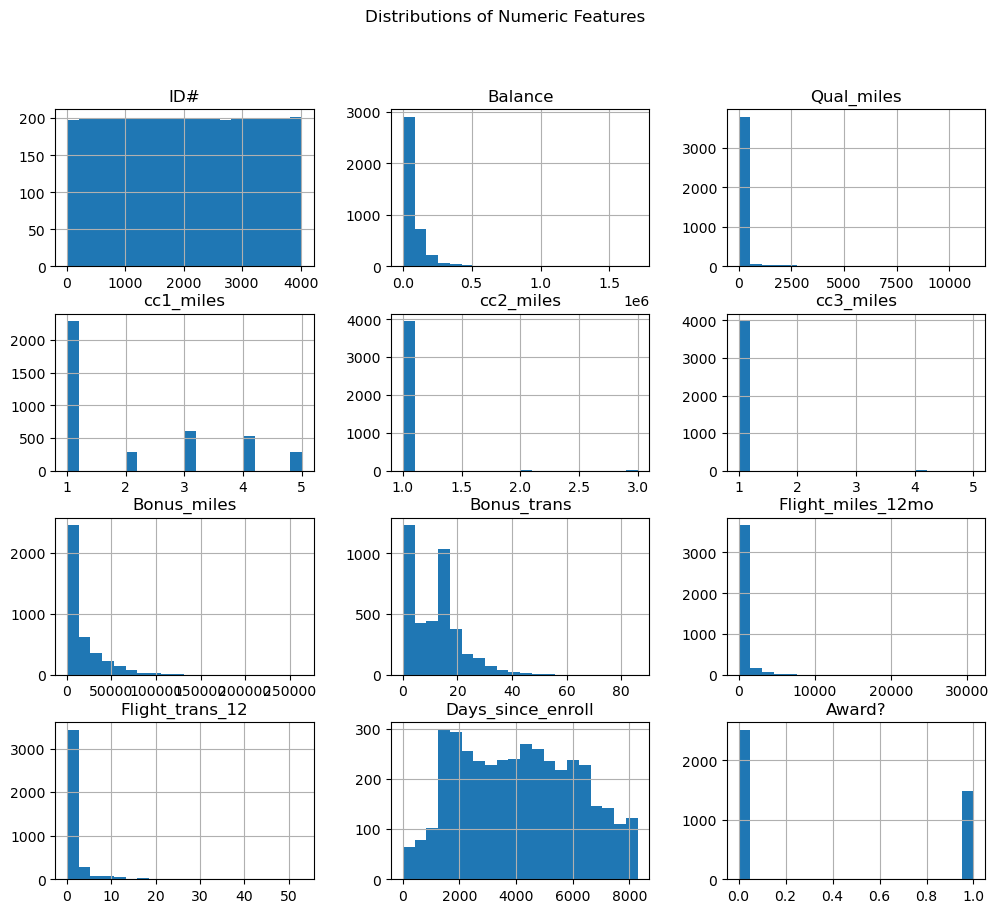

In [25]:
df_numeric.hist(figsize=(12,10), bins=20)
plt.suptitle("Distributions of Numeric Features")
plt.show()

BOXPLOT

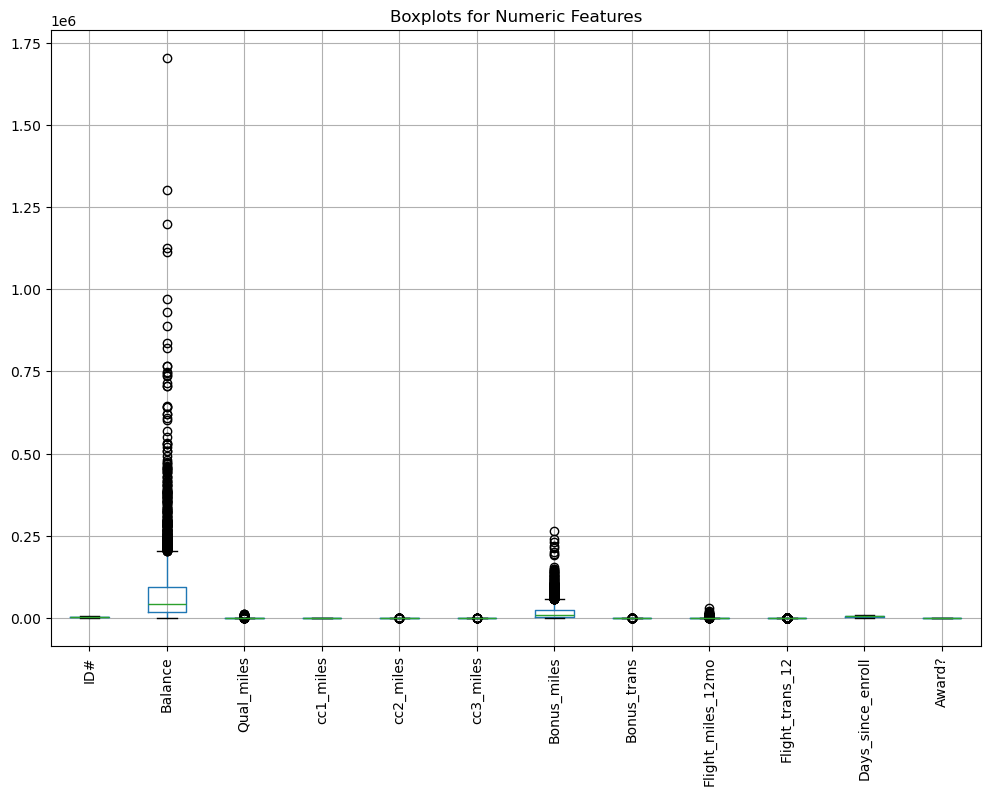

In [28]:
plt.figure(figsize=(12,8))
df_numeric.boxplot(rot=90)
plt.title("Boxplots for Numeric Features")
plt.show()

CORR HEATMAP

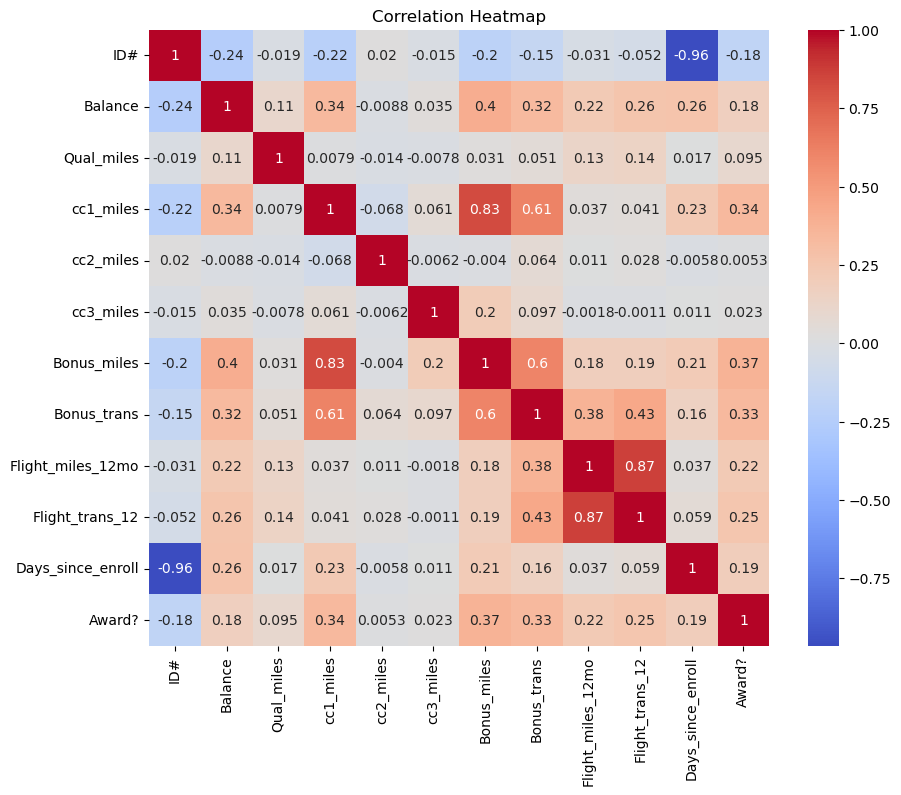

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Histograms show the distribution of each numeric feature.

Boxplots help detect outliers.

Correlation heatmap shows relationships between features, useful to understand multicollinearity.

***K-Means Clustering***

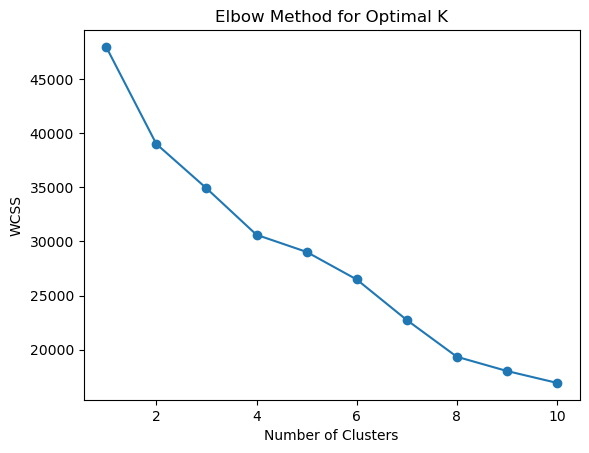

In [30]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Fit K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)


Elbow method helps find the optimal number of clusters by plotting WCSS (Within-Cluster Sum of Squares).

After choosing k=3, K-Means assigns each data point to a cluster

***Hierarchical Clustering***

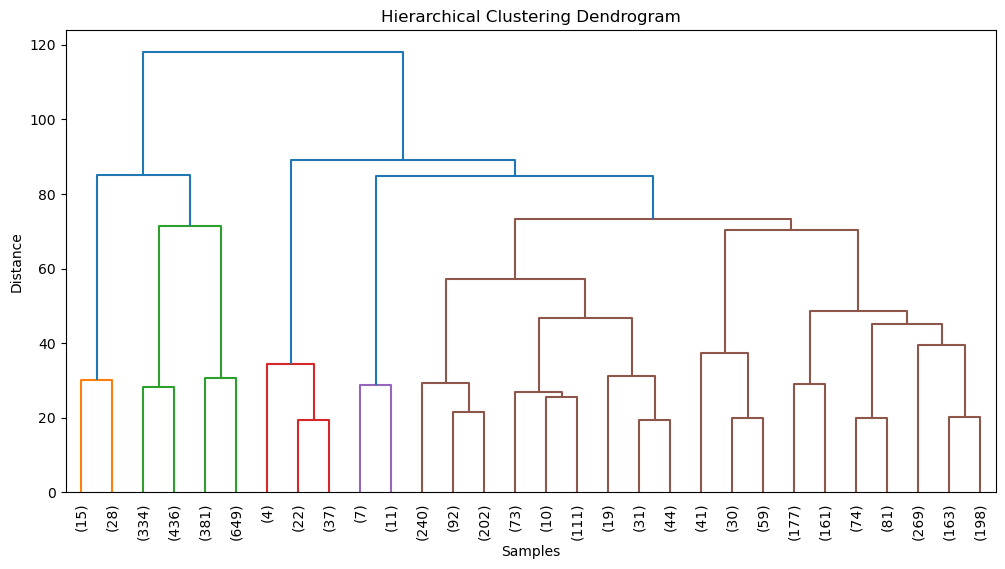

In [31]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

df["Hier_Cluster"] = fcluster(linked, t=3, criterion='maxclust')


linkage with 'ward' method calculates distances for hierarchical clustering.

Dendrogram visualizes the merging of clusters step by step.

fcluster cuts the dendrogram to assign cluster labels (here 3 clusters)

***DBSCAN Clustering***

In [32]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)


DBSCAN groups points that are closely packed together.

eps defines neighborhood radius, min_samples is the minimum points to form a cluster.

Points labeled -1 are considered noise.

***Cluster Visualization***

In [34]:
features_to_plot = [0, 1]  # first two numeric features for scatter plots


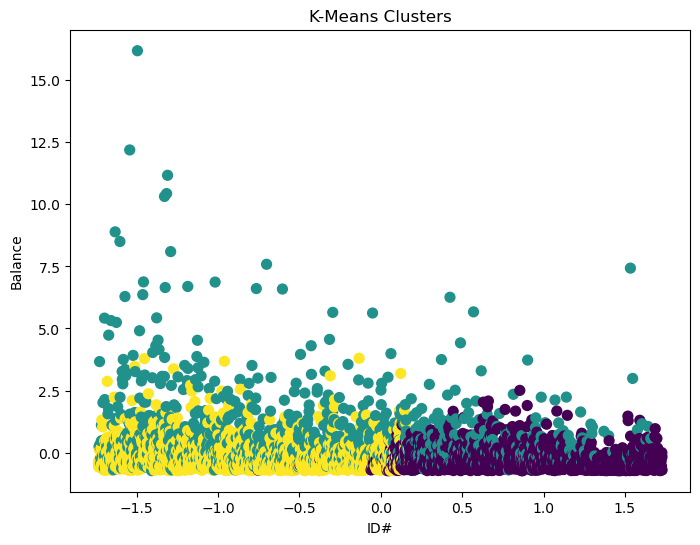

In [35]:
# K-Means
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,features_to_plot[0]], X_scaled[:,features_to_plot[1]], 
            c=df["KMeans_Cluster"], cmap='viridis', s=50)
plt.title("K-Means Clusters")
plt.xlabel(df_numeric.columns[features_to_plot[0]])
plt.ylabel(df_numeric.columns[features_to_plot[1]])
plt.show()

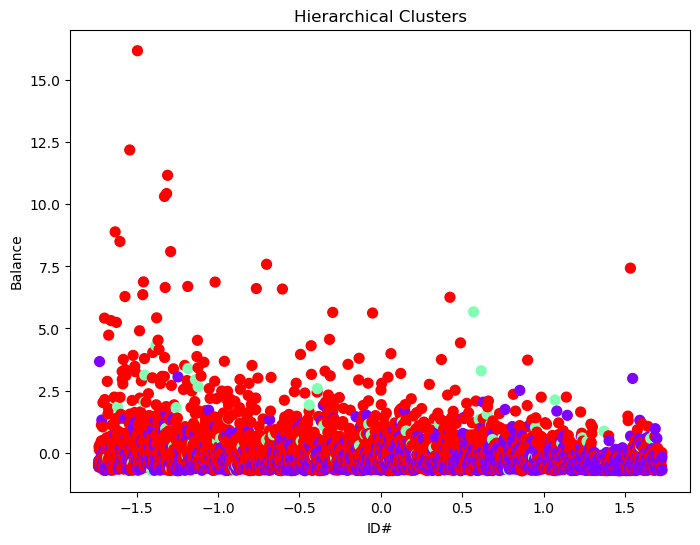

In [36]:
# Hierarchical
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,features_to_plot[0]], X_scaled[:,features_to_plot[1]], 
            c=df["Hier_Cluster"], cmap='rainbow', s=50)
plt.title("Hierarchical Clusters")
plt.xlabel(df_numeric.columns[features_to_plot[0]])
plt.ylabel(df_numeric.columns[features_to_plot[1]])
plt.show()

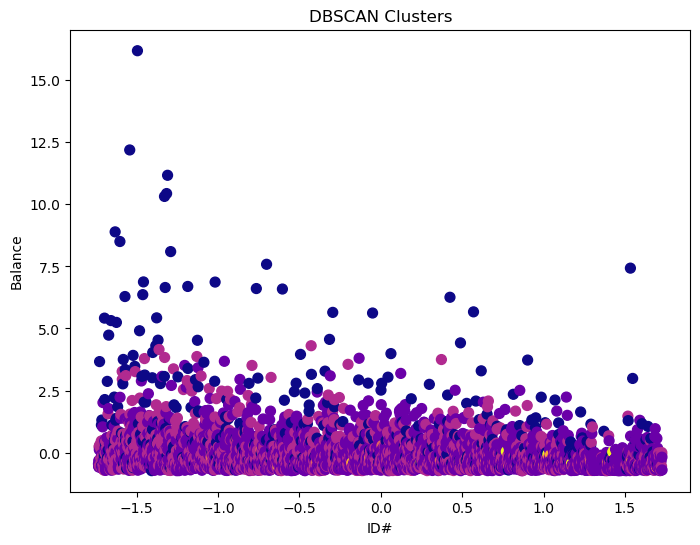

In [37]:
# DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,features_to_plot[0]], X_scaled[:,features_to_plot[1]], 
            c=df["DBSCAN_Cluster"], cmap='plasma', s=50)
plt.title("DBSCAN Clusters")
plt.xlabel(df_numeric.columns[features_to_plot[0]])
plt.ylabel(df_numeric.columns[features_to_plot[1]])
plt.show()

Scatter plots visualize how data points are grouped in each clustering method.

Different colors represent different clusters.

Helps understand separation between clusters.

***Evaluation (Silhouette Score)***

In [39]:
sil_kmeans = silhouette_score(X_scaled, df["KMeans_Cluster"])
print("Silhouette Score for K-Means:", sil_kmeans)

sil_hier = silhouette_score(X_scaled, df["Hier_Cluster"])
print("Silhouette Score for Hierarchical:", sil_hier)

mask = df["DBSCAN_Cluster"] != -1
if sum(mask) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], df["DBSCAN_Cluster"][mask])
    print("Silhouette Score for DBSCAN:", sil_dbscan)
else:
    print("DBSCAN: Not enough clusters to compute silhouette score")


Silhouette Score for K-Means: 0.201891717665419
Silhouette Score for Hierarchical: 0.20526614352218822
Silhouette Score for DBSCAN: 0.2382502956643838


Silhouette score measures how similar an object is to its own cluster vs other clusters.

Score ranges from -1 to 1; higher is better.

DBSCAN may have noise points, so we exclude -1.

***Cluster Analysis & Interpretation***

In [40]:
print("\n--- K-Means Cluster Means ---")
print(df.groupby("KMeans_Cluster").mean())

print("\n--- Hierarchical Cluster Means ---")
print(df.groupby("Hier_Cluster").mean())

print("\n--- DBSCAN Cluster Means ---")
print(df.groupby("DBSCAN_Cluster").mean())

# Save results
df.to_excel("Clustered_Customers_Complete.xlsx", index=False)
print("✅ All clustering completed! Results saved in Excel")



--- K-Means Cluster Means ---
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               3111.388308   40980.913231  105.005538   1.444308   1.016615   
1               1533.872934  150218.949380  297.365702   3.833678   1.007231   
2               1078.568990   58553.187767   83.805121   1.549075   1.017070   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.001846   6917.616000     8.138462         237.179692   
1                1.046488  48249.512397    21.637397        1197.568182   
2                1.000711   7550.203414     8.695590         209.886202   

                Flight_trans_12  Days_since_enroll    Award?  Hier_Cluster  \
KMeans_Cluster                                                               
0                      0.691077     

Grouping by cluster shows the average characteristics of each cluster.

Cluster 0: High balance and miles → frequent high-value customers

Cluster 1: Low usage → occasional flyers

DBSCAN noise (-1) → outliers or irregular customers

***OVERALL ANALYSIS***

K-Means is effective for well-separated, spherical clusters but requires the number of clusters beforehand.

Hierarchical clustering helps visualize cluster relationships and is useful when the number of clusters is unknown.

DBSCAN is valuable to detect noise/outliers and identify clusters of varying density without predefining the number of clusters.

All three methods together provide complementary insights into customer segmentation, which can be used for targeted marketing, loyalty programs, or identifying premium customers

***Conclusion***
The clustering analysis successfully segmented airline customers into meaningful groups.

Each algorithm has its strengths: K-Means for simple partitioning, Hierarchical for structure visualization, and DBSCAN for detecting irregular customers.

Using visualization and silhouette scores, we confirmed that clusters are reasonably well-separated.

The insights gained can be applied to improve customer relationship management and business strategies.